# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

##### Reframed Task

To understand what factors make a car more or less expensive, we will build a regression model that predicts the price of used cars, provided certain features. From this model, we can then extract the importance of each features within the model (our data mining goal). This information will inform us of the most important factors.

More technically, we will leverage Python, along with the supporting data science and machine learning libraries, namely Pandas, Numpy, and Sklearn. GridSearchCV will be used to search for the optimal regression model and optimal hyperparameters in order to achieve the data mining goal stated above.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

##### Planned steps

Taking an iterative approach through the data using EDA techniques, we will consider taking the following steps as needed:

- Describe the data that has been acquired, including the format of the data, the quantity of data (for example, the number of records and fields in each table), the identities of the fields, and any other surface features which have been discovered. Evaluate whether the data acquired satisfies the relevant requirements.
- Address data mining questions using querying, visualization, and reporting techniques. These include distribution of key attributes (for example, the target attribute of a prediction task) relationships between pairs or small numbers of attributes, results of simple aggregations, properties of significant sub-populations, and simple statistical analyses.
- Conduct data quality verification; if quality problems exist, list possible solutions.

##### Import libraries

In [1]:
# Import libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
import numpy as np
import plotly.express as px
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

##### Load the dataset

In [4]:
# Load the data
data = pd.read_csv('data/vehicles.csv')
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
# Explore the data, data types, and any null values
data = data.convert_dtypes()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            426880 non-null  Int64 
 1   region        426880 non-null  string
 2   price         426880 non-null  Int64 
 3   year          425675 non-null  Int64 
 4   manufacturer  409234 non-null  string
 5   model         421603 non-null  string
 6   condition     252776 non-null  string
 7   cylinders     249202 non-null  string
 8   fuel          423867 non-null  string
 9   odometer      422480 non-null  Int64 
 10  title_status  418638 non-null  string
 11  transmission  424324 non-null  string
 12  VIN           265838 non-null  string
 13  drive         296313 non-null  string
 14  size          120519 non-null  string
 15  type          334022 non-null  string
 16  paint_color   296677 non-null  string
 17  state         426880 non-null  string
dtypes: Int64(4), string(14)


In [6]:
# Get descriptive statistics on both numeric and categorical data
data.describe(include = 'all')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880.0,426880,426880.0,425675.0,409234,421603,252776,249202,423867,422480.0,418638,424324,265838,296313,120519,334022,296677,426880
unique,<NA>,404,<NA>,<NA>,42,29649,6,8,5,<NA>,6,3,118246,3,4,13,12,51
top,<NA>,columbus,<NA>,<NA>,ford,f-150,good,6 cylinders,gas,<NA>,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,<NA>,3608,<NA>,<NA>,70985,8009,121456,94169,356209,<NA>,405117,336524,261,131904,63465,87056,79285,50614
mean,7311486634.224333,NaN,75199.033187,2011.235191,NaN,NaN,NaN,NaN,NaN,98043.331443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4473170.412559,NaN,12182282.173598,9.45212,NaN,NaN,NaN,NaN,NaN,213881.500798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7207408119.0,NaN,0.0,1900.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7308143339.25,NaN,5900.0,2008.0,NaN,NaN,NaN,NaN,NaN,37704.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7312620821.0,NaN,13950.0,2013.0,NaN,NaN,NaN,NaN,NaN,85548.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7315253543.5,NaN,26485.75,2017.0,NaN,NaN,NaN,NaN,NaN,133542.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# To sample some records
data.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
319348,7314942756,medford-ashland,23980,2012,chevrolet,silverado 1500,<NA>,<NA>,gas,43858,clean,automatic,1GCRCPE03CZ314189,<NA>,<NA>,other,<NA>,or
170168,7303833137,wichita,15995,2016,toyota,sienna,<NA>,6 cylinders,gas,125776,clean,automatic,5TDZK3DC3GS695265,fwd,<NA>,other,white,ks
360843,7311656672,nashville,13999,2011,bmw,1 series,<NA>,<NA>,gas,107409,clean,automatic,WBAUN7C5XBVM24274,rwd,<NA>,convertible,silver,tn
422031,7317098055,milwaukee,4000,2009,toyota,corolla,good,4 cylinders,gas,132000,clean,automatic,<NA>,fwd,full-size,sedan,red,wi
359169,7315524739,nashville,4200,2018,nissan,pathfinder,excellent,<NA>,gas,44524,rebuilt,automatic,5N1DR2MN0JC609464,fwd,<NA>,<NA>,<NA>,tn


##### Identify duplicates and drop ID columns
Before turning attention to null values, we'll first address low hanging fruit of duplicates and unnecessary ID columns.

In [8]:
# Check for duplicates
data.groupby('VIN').count().sort_values(by = 'id', ascending=False).head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
VIN,,,,,,,,,,,,,,,,,
1FMJU1JT1HEA52352,261,261,261,261,261,261,261,261,261,261,261,261,261,0,261,261,261
3C6JR6DT3KG560649,235,235,235,235,235,235,235,235,235,235,235,235,0,0,235,235,235
1FTER1EH1LLA36301,231,231,231,231,231,231,231,0,231,231,231,231,0,0,231,231,231
5TFTX4CN3EX042751,227,227,227,227,227,227,227,0,227,227,227,227,0,0,227,227,227
1GCHTCE37G1186784,214,214,214,214,214,214,214,214,214,214,214,214,214,0,214,214,214
1GTN1TEH5EZ273019,207,207,207,207,207,207,207,207,207,207,207,207,0,0,207,207,207
3VWF17AT1FM655022,199,199,199,199,199,199,199,0,199,199,199,199,199,0,199,199,199
JN1AZ4EH8KM420880,198,198,198,198,198,198,198,198,198,198,198,198,198,0,198,198,198
1FTMF1CP3GKD62143,195,195,195,195,195,195,195,195,195,195,195,195,0,0,195,195,195


In [9]:
# Inspect some duplicates
data[data['VIN'] == '1FMJU1JT1HEA52352'].head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
76,7311818189,auburn,29590,2017,ford,expedition xlt sport,good,6 cylinders,gas,70760,clean,other,1FMJU1JT1HEA52352,4wd,<NA>,SUV,blue,al
707,7311865995,birmingham,29590,2017,ford,expedition xlt sport,good,6 cylinders,gas,70760,clean,other,1FMJU1JT1HEA52352,4wd,<NA>,SUV,blue,al
1935,7311801032,dothan,29590,2017,ford,expedition xlt sport,good,6 cylinders,gas,70760,clean,other,1FMJU1JT1HEA52352,4wd,<NA>,SUV,blue,al
2201,7311915565,florence / muscle shoals,29590,2017,ford,expedition xlt sport,good,6 cylinders,gas,70760,clean,other,1FMJU1JT1HEA52352,4wd,<NA>,SUV,blue,al
2377,7311823034,gadsden-anniston,29590,2017,ford,expedition xlt sport,good,6 cylinders,gas,70760,clean,other,1FMJU1JT1HEA52352,4wd,<NA>,SUV,blue,al


Since the only difference is region and state (but otherwise all equal including price) for the duplicate VINs, we assume they are the same (ie. listed in multiple places) and remove the duplicate values

In [10]:
# prepare the list of columns for drop_duplicate to use, drop the ones to ignore
dup_columns = data.columns.tolist()
dup_columns.remove('region')
dup_columns.remove('id')
dup_columns.remove('state')
dup_columns

['price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color']

In [11]:
# Drop duplicate records while ensuring no valid duplicates are removed 
# ie. same VIN different sale activity
data1 = data.drop_duplicates(subset = dup_columns, keep='first') # only drops records where all columns are identifical by default
data1[data1['VIN'] == '1FMJU1JT1HEA52352'].head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
76,7311818189,auburn,29590,2017,ford,expedition xlt sport,good,6 cylinders,gas,70760,clean,other,1FMJU1JT1HEA52352,4wd,<NA>,SUV,blue,al


In [12]:
data1.shape[0]

248742

In [13]:
# Drop the identification records first as they are of no further use 
data2 = data1.drop(columns = ['id', 'VIN'])
data2.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,az
1,fayetteville,11900,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,ar
2,florida keys,21000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,fl
3,worcester / central MA,1500,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,ma
4,greensboro,4900,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,nc


##### Understand any anomalies in the target

In [14]:
data2.describe()[['price']]

,price
count,248742.0
mean,113252.704557
std,15958849.655204
min,0.0
25%,4900.0
50%,9999.0
75%,19964.0
max,3736928711.0


Price min and max look questionable, we will apply interquartile range (IQR) to identify outliers and remove them.

Since price is not normally distributed (see next section) we will also take the log as a precursor to examining the IQR.

In [15]:
### What do the outliers look like for price
first_quartile = np.log(data2['price']).quantile(0.25)
third_quartile = np.log(data2['price']).quantile(0.75)
iqr = third_quartile - first_quartile
lower = first_quartile - 1.5*iqr
upper = third_quartile + 1.5*iqr
print(f'Values for which Price is in the outlier range are: below {np.exp(lower)} and above {np.exp(upper)}')

Values for which Price is in the outlier range are: below 595.8251874312534 and above 164181.71313257373


In [16]:
### Show some samples (lower)
data2[np.log(data2['price']) <= lower].sample(3)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
380762,san antonio,199,2017,dodge,charger,<NA>,<NA>,gas,19720,clean,automatic,<NA>,<NA>,<NA>,<NA>,tx
46088,redding,0,2017,gmc,sierra 3500 slt lifted dura,<NA>,8 cylinders,diesel,77795,clean,automatic,4wd,<NA>,truck,<NA>,ca
383442,tyler / east TX,0,2009,chevrolet,corvette,excellent,8 cylinders,gas,70218,clean,automatic,rwd,<NA>,coupe,red,tx


In [17]:
### Show some samples (upper)
data2[np.log(data2['price']) >= upper].sample(3)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
45428,palm springs,349999,2020,ferrari,f8 tributo,excellent,8 cylinders,gas,2800,clean,automatic,<NA>,<NA>,coupe,<NA>,ca
277077,new york city,179999,2018,porsche,911,<NA>,<NA>,gas,11195,clean,automatic,rwd,<NA>,coupe,silver,ny
45228,palm springs,174700,2015,<NA>,Rolls-Royce Wraith,excellent,12 cylinders,gas,31973,clean,automatic,<NA>,<NA>,coupe,<NA>,ca


None of these prices make sense. A common used car that is priced for free or astronomically look like troll entries. These will be discarded.

In [18]:
data_no_outlier = data2[(np.log(data2['price']) > lower) & (np.log(data2['price']) < upper)]

In [19]:
data2.shape[0]

248742

In [20]:
data_no_outlier.shape[0]

224831

In [21]:
data_no_outlier.describe()

,price,year,odometer
count,224831.0,224150.0,223682.0
mean,15907.283698,2009.01963,113802.076627
std,14046.876414,10.903886,228548.323122
min,596.0,1900.0,0.0
25%,6000.0,2006.0,55217.0
50%,11899.0,2012.0,102000.0
75%,21000.0,2016.0,148482.0
max,163540.0,2022.0,10000000.0


##### Understand the distribution in the target

As highlighted earlier, we noted the distribution is not normal in our target, price. We examine the distribution below for across all samples, as well as for filtering for records with and without null values in the features (using size as a proxy given it has the most nulls).

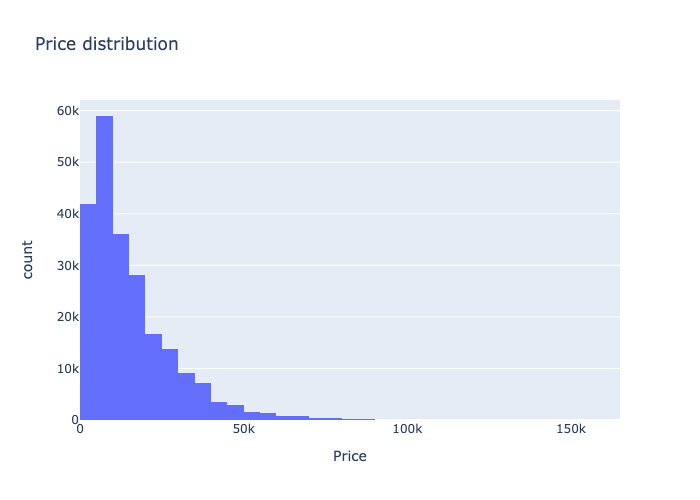

In [37]:
### What does distribution look like for price
plot = px.histogram(x = data_no_outlier['price'], title='Price distribution',
                    labels = {'x': 'Price'})
plot.update_traces(xbins=dict( # bins used for histogram
        start=0,
        end=200000, 
        size=5000
    ))
plot.show('png')

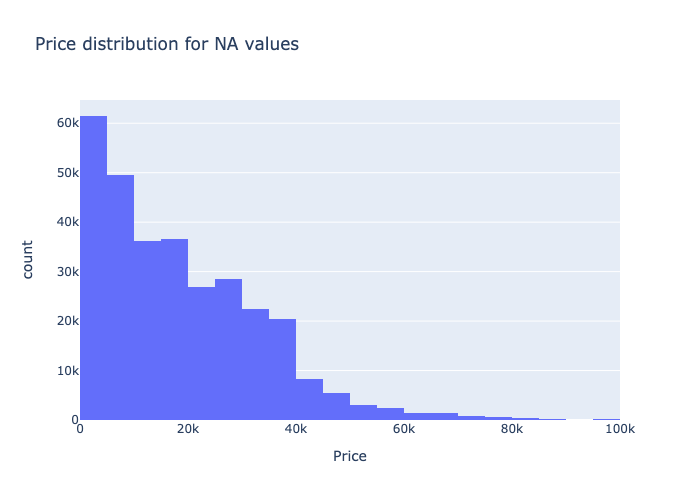

In [35]:
### What does price distribution look like for the NA data vs Non-NA ###
plot = px.histogram(x = data[data['size'].isnull() == True]['price'], title='Price distribution for NA values',
                    labels = {'x': 'Price'})
plot.update_traces(xbins=dict( # bins used for histogram
        start=0,
        end=100000, # exclude the outliers ie. max
        size=5000
    ))
plot.show('png')

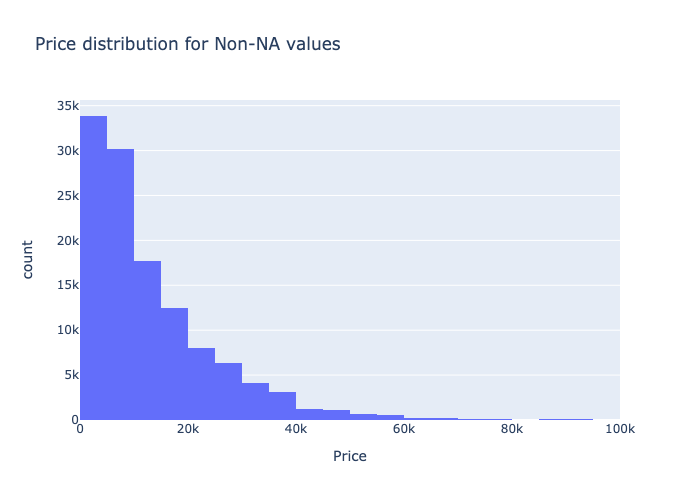

In [34]:
### What does price distribution look like for the NA data vs Non-NA ###
plot = px.histogram(x = data[data['size'].isnull() == False]['price'], title='Price distribution for Non-NA values',
                    labels = {'x': 'Price'})
plot.update_traces(xbins=dict( # bins used for histogram
        start=0,
        end=100000, # exclude the outliers ie. max
        size=5000
    ))
plot.show('png')

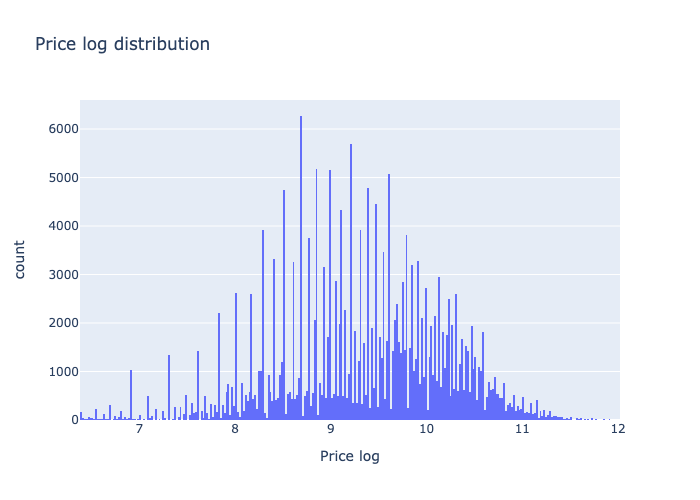

In [32]:
### What does distribution look like for price (log)
plot = px.histogram(x = np.log(data_no_outlier['price']), title='Price log distribution',
                    labels = {'x': 'Price log'},)
"""plot.update_traces(xbins=dict( # bins used for histogram
        start=0,
        end=100000, # exclude the outliers ie. max
        size=5000
    ))"""
plot.show('png')

##### Understand the distribution in the categorical data

In [26]:
### Get list of our numeric vs categorical data ###
numeric = data_no_outlier.select_dtypes('Int64').columns
categorical = data_no_outlier.select_dtypes('string').columns

In [27]:
### Understand values within the categorical data types if 10 distinct values or less ###
big_cat = []
small_cat = []

for c in categorical:
    if len(data_no_outlier[c].unique()) > 10:
        print(f'{c} contains {len(data_no_outlier[c].unique())} distinct values \n')
        big_cat.append(c)
    else:
        print(f'{c} contains values: \n {data_no_outlier[c].unique().tolist()} \n')
        small_cat.append(c)

region contains 404 distinct values 

manufacturer contains 43 distinct values 

model contains 27410 distinct values 

condition contains values: 
 [<NA>, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'] 

cylinders contains values: 
 [<NA>, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders', '3 cylinders', '10 cylinders', 'other', '12 cylinders'] 

fuel contains values: 
 [<NA>, 'gas', 'other', 'diesel', 'hybrid', 'electric'] 

title_status contains values: 
 [<NA>, 'clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only'] 

transmission contains values: 
 [<NA>, 'other', 'automatic', 'manual'] 

drive contains values: 
 [<NA>, 'rwd', '4wd', 'fwd'] 

size contains values: 
 [<NA>, 'full-size', 'mid-size', 'compact', 'sub-compact'] 

type contains 14 distinct values 

paint_color contains 13 distinct values 

state contains 51 distinct values 



In [28]:
### Confirm what are the NA values - are these null or NA ###
data_no_outlier['condition'].value_counts(dropna = False)

condition
<NA>         84139
excellent    65482
good         52548
like new     15035
fair          6281
new            844
salvage        502
Name: count, dtype: Int64

In [29]:
small_cat

['condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size']

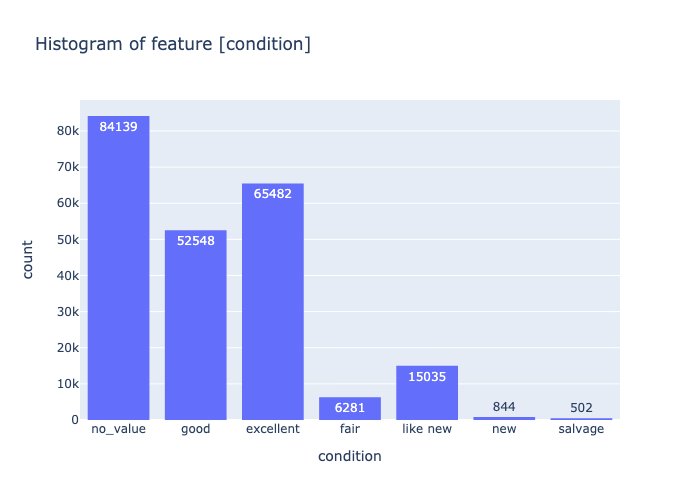

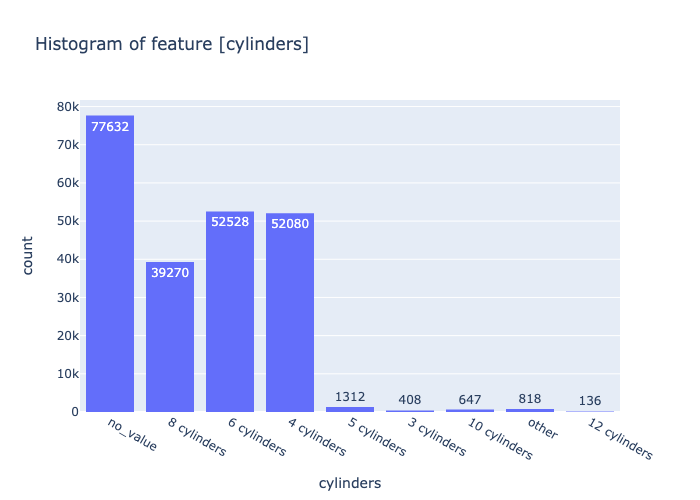

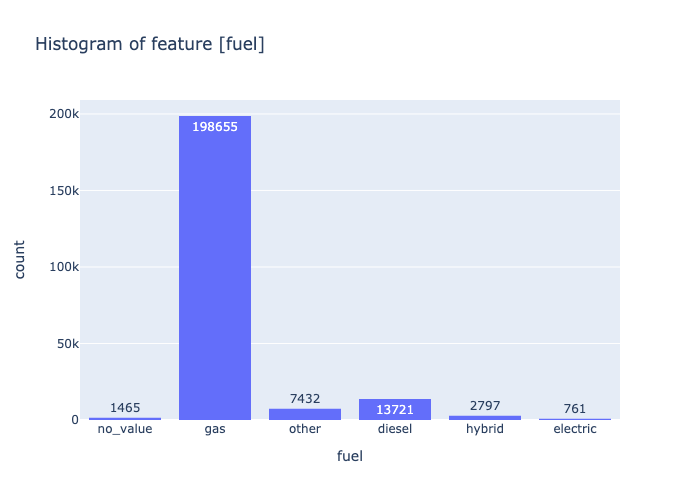

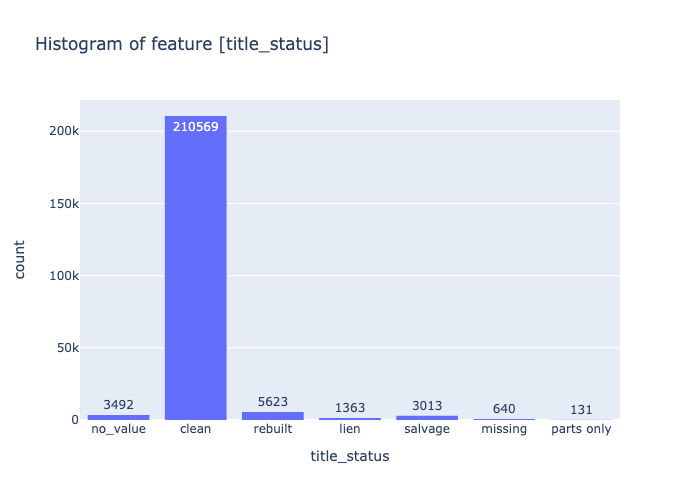

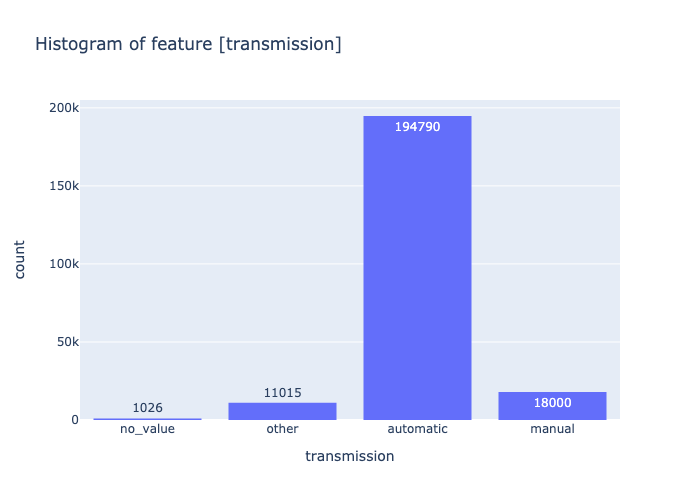

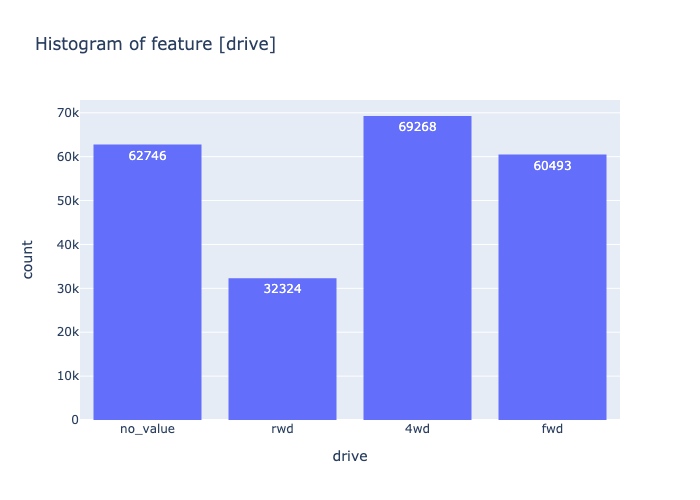

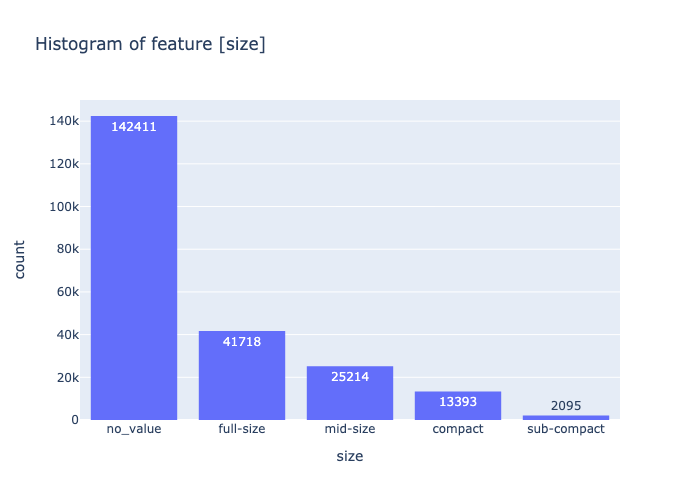

In [30]:
### What does distribution look like for categorical values less than 10 distinct ###
for c in small_cat:
    plot = px.histogram(x = data_no_outlier[c].fillna(value = 'no_value'), 
                        title='Histogram of feature ['+c+']',
                        labels = {'x': c},
                        text_auto = '.0f',
                        )
    plot.show('png')

##### Understand the distribution in the numeric data

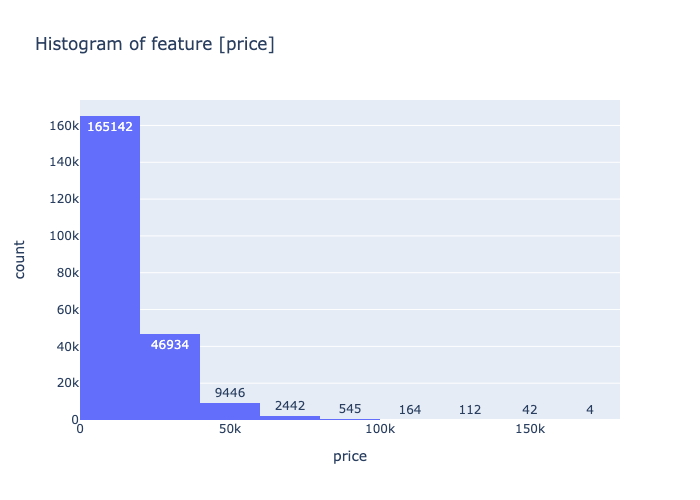

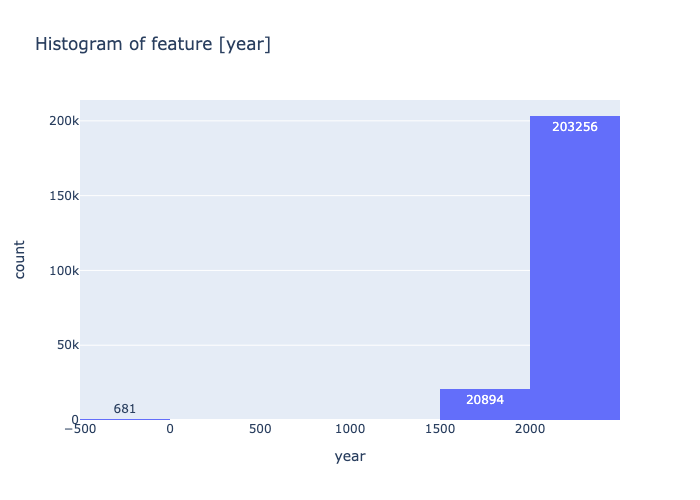

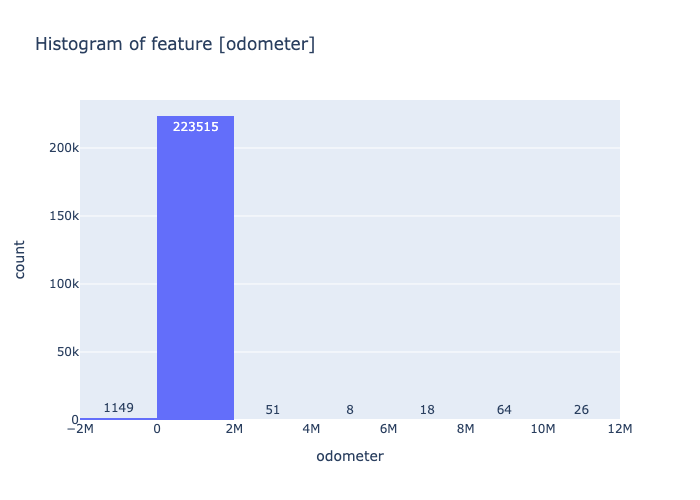

In [31]:
### What does distribution look like for numeric values ###
for c in numeric:
    plot = px.histogram(x = data_no_outlier[c].fillna(value = -1), 
                        title='Histogram of feature ['+c+']',
                        nbins = 10,
                        labels = {'x': c},
                        text_auto = '.0f',
                        )
    plot.show('png')

##### Determining best way to address undesirable null values for categoricals

Instead of dropping all null values, we will take nothingness as still useful information. We will fill null values with 'no_value' for categoricals as there are quite many. We will drop nulls on the numeric as there are far fewer.

Future iterations can consider more computationally expensive methods such as KNN imputing.

In [346]:
# first build a dictionary for what to fill in each column
fill_list = []
for c in data_no_outlier.columns.to_list():
    if c in categorical:
        fill_list.append((c, 'no_value'))
    # if c in numeric:
       # fill_list.append((c, '-1'))

fill_dict = dict(fill_list)
fill_dict


{'region': 'no_value',
 'manufacturer': 'no_value',
 'model': 'no_value',
 'condition': 'no_value',
 'cylinders': 'no_value',
 'fuel': 'no_value',
 'title_status': 'no_value',
 'transmission': 'no_value',
 'drive': 'no_value',
 'size': 'no_value',
 'type': 'no_value',
 'paint_color': 'no_value',
 'state': 'no_value'}

In [347]:
# then fill the categorical columns
data_filled = data_no_outlier.fillna(fill_dict)
data_filled.isnull().sum()

region             0
price              0
year             681
manufacturer       0
model              0
condition          0
cylinders          0
fuel               0
odometer        1149
title_status       0
transmission       0
drive              0
size               0
type               0
paint_color        0
state              0
dtype: int64

In [348]:
# then drop the nulls in the numeric columns
data_filled2 = data_filled.dropna()
data_filled2.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

##### Determing best encoding for categoricals
We complete a trial run of encoding below despite only exploring the data at this point

In [349]:
# For categoricals which has too many dsitnct values to OHE
# Use Category Encorders (James-Stein and Target) that don't create new variables 
# https://contrib.scikit-learn.org/category_encoders/

import category_encoders as ce
encoder = ce.JamesSteinEncoder(
        #cols = ['model', 'region', 'state'],
        cols = big_cat,
        handle_missing='return_nan'
        )
data_transformed = encoder.fit_transform(data_filled2, np.log(data_filled2['price']))
data_transformed.head()


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,9.89894,33590,2014,9.473879,10.556386,good,8 cylinders,gas,57923,clean,other,no_value,no_value,9.610257,9.447866,9.473709
28,9.89894,22590,2010,9.332575,9.570657,good,8 cylinders,gas,71229,clean,other,no_value,no_value,9.610257,9.248944,9.473709
29,9.89894,39590,2020,9.332575,9.90279,good,8 cylinders,gas,19160,clean,other,no_value,no_value,9.610257,9.306199,9.473709
30,9.89894,30990,2017,9.277082,10.391836,good,8 cylinders,gas,41124,clean,other,no_value,no_value,9.610257,9.306199,9.473709
31,9.89894,15000,2013,9.37257,9.546803,excellent,6 cylinders,gas,128000,clean,automatic,rwd,full-size,9.568095,9.423523,9.473709


In [350]:
# prepare columns for OHE that have no ordinal property
ohe_list = small_cat
ohe_list.remove('condition')
ohe_list

['cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size']

In [161]:
# conduct the OHE
ohe = ce.OneHotEncoder(
    cols = ohe_list,
    handle_missing = 'return_nan'
    )
data_jseohe = ohe.fit_transform(data_transformed, data_transformed['price'])

In [162]:
pd.set_option('display.max_columns', 500) # default is 20
data_jseohe.tail(5)

,region,price,year,manufacturer,model,condition,cylinders_1,cylinders_2,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_7,cylinders_8,cylinders_9,fuel_1,fuel_2,fuel_3,fuel_4,fuel_5,fuel_6,odometer,title_status_1,title_status_2,title_status_3,title_status_4,title_status_5,title_status_6,title_status_7,transmission_1,transmission_2,transmission_3,transmission_4,drive_1,drive_2,drive_3,drive_4,size_1,size_2,size_3,size_4,size_5,type,paint_color,state
426833,9.303423,6800,1997,9.366905,9.273785,good,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,69550,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.375726,9.447866,9.30306
426838,9.303423,21900,1920,9.267046,9.994242,good,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11065,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.594346,9.423523,9.30306
426839,9.303423,54999,2017,9.267046,10.346855,no_value,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,119000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.213516,9.252672,9.30306
426846,9.303423,41999,2015,9.267046,9.702064,no_value,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,126000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.213516,9.252672,9.30306
426873,9.303423,30990,2018,9.439646,10.399957,good,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15080,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.594346,9.447866,9.30306


In [163]:
# finally conduct OE for the one ordinal column
ordinal = ce.OrdinalEncoder(
    cols = ['condition'],
    handle_missing = 'return_nan',
    handle_unknown = 'return_nan',
    mapping = 
        [{
            'col': 'condition',
            'mapping':
                {'new' : 5,
                'like new': 4,
                'excellent':3,
                'good': 2,
                'fair': 1,
                'salvage': 0,
                'no_value': 0}
        }]
    )
data_jseoheord = ordinal.fit_transform(data_jseohe, data_jseohe['price'])

In [164]:
data_jseoheord.head(5)

,region,price,year,manufacturer,model,condition,cylinders_1,cylinders_2,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_7,cylinders_8,cylinders_9,fuel_1,fuel_2,fuel_3,fuel_4,fuel_5,fuel_6,odometer,title_status_1,title_status_2,title_status_3,title_status_4,title_status_5,title_status_6,title_status_7,transmission_1,transmission_2,transmission_3,transmission_4,drive_1,drive_2,drive_3,drive_4,size_1,size_2,size_3,size_4,size_5,type,paint_color,state
27,9.89894,33590,2014,9.473879,10.556386,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,57923,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.610257,9.447866,9.473709
28,9.89894,22590,2010,9.332575,9.570657,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,71229,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.610257,9.248944,9.473709
29,9.89894,39590,2020,9.332575,9.90279,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19160,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.610257,9.306199,9.473709
30,9.89894,30990,2017,9.277082,10.391836,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,41124,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.610257,9.306199,9.473709
31,9.89894,15000,2013,9.37257,9.546803,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,128000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.568095,9.423523,9.473709


In [165]:
data_jseoheord.shape

(223053, 45)

In [166]:
#data2.describe()
data_jseoheord.describe()

,region,price,year,manufacturer,model,condition,cylinders_1,cylinders_2,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_7,cylinders_8,cylinders_9,fuel_1,fuel_2,fuel_3,fuel_4,fuel_5,fuel_6,odometer,title_status_1,title_status_2,title_status_3,title_status_4,title_status_5,title_status_6,title_status_7,transmission_1,transmission_2,transmission_3,transmission_4,drive_1,drive_2,drive_3,drive_4,size_1,size_2,size_3,size_4,size_5,type,paint_color,state
count,223053.0,223053.0,223053.0,223053.0,223053.0,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.00000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.0,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.000000,223053.0,223053.0,223053.0
mean,9.312516,15842.494129,2009.005895,9.308704,9.329246,1.659583,0.174667,0.233774,0.345035,0.231734,0.005869,0.001807,0.002865,0.003658,0.000592,0.88418,0.033198,0.061151,0.012495,0.005577,0.003398,114044.697937,0.937737,0.024765,0.006111,0.014436,0.013495,0.002869,0.000587,0.049302,0.866413,0.080402,0.003882,0.279113,0.143625,0.308138,0.269124,0.631554,0.186588,0.112825,0.059771,0.009262,9.31256,9.315264,9.311443
std,0.11944,13991.120235,10.918115,0.144342,0.507218,1.416290,0.379683,0.423231,0.475381,0.421941,0.076382,0.042468,0.053447,0.060373,0.024320,0.32001,0.179155,0.239608,0.111080,0.074472,0.058196,228817.439036,0.241634,0.155410,0.077932,0.119280,0.115380,0.053489,0.024227,0.216499,0.340209,0.271916,0.062189,0.448564,0.350710,0.461725,0.443506,0.482384,0.389581,0.316380,0.237062,0.095795,0.153912,0.090695,0.089422
min,8.895845,596.0,1900.0,8.556151,6.390241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.016799,9.076826,9.124438
25%,9.230532,6000.0,2006.0,9.239458,9.047821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,55795.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.183204,9.252672,9.241997
50%,9.313157,11795.0,2012.0,9.332575,9.300431,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,102034.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.213516,9.258775,9.321621
75%,9.385162,20999.0,2015.0,9.37257,9.579614,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,148700.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.364145,9.423523,9.360832
max,10.632839,163540.0,2022.0,10.045236,12.001475,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,10000000.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.610257,9.447866,9.605429


##### Understanding correlations
With the encoding completed we have the ability to understand the correlation between features. To keep the matrix smaller we will forgo the previous encoding and apply JamesStein across all categorical columns.

In [184]:
# for sake of correlation matrix viewing we'll try encoding all categorical with JS
import category_encoders as ce
encoder = ce.JamesSteinEncoder(
        #cols = ['model', 'region', 'state'],
        cols = categorical,
        handle_missing='return_nan'
        )
data_corr = encoder.fit_transform(data_filled2, np.log(data_filled2['price']))
data_corr.head()


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,9.89894,33590,2014,9.473879,10.556386,9.17271,9.452024,9.26297,57923,9.321294,9.863522,9.223738,9.375854,9.610257,9.447866,9.473709
28,9.89894,22590,2010,9.332575,9.570657,9.17271,9.452024,9.26297,71229,9.321294,9.863522,9.223738,9.375854,9.610257,9.248944,9.473709
29,9.89894,39590,2020,9.332575,9.90279,9.17271,9.452024,9.26297,19160,9.321294,9.863522,9.223738,9.375854,9.610257,9.306199,9.473709
30,9.89894,30990,2017,9.277082,10.391836,9.17271,9.452024,9.26297,41124,9.321294,9.863522,9.223738,9.375854,9.610257,9.306199,9.473709
31,9.89894,15000,2013,9.37257,9.546803,9.335172,9.267074,9.26297,128000,9.321294,9.297959,9.397456,9.286494,9.568095,9.423523,9.473709


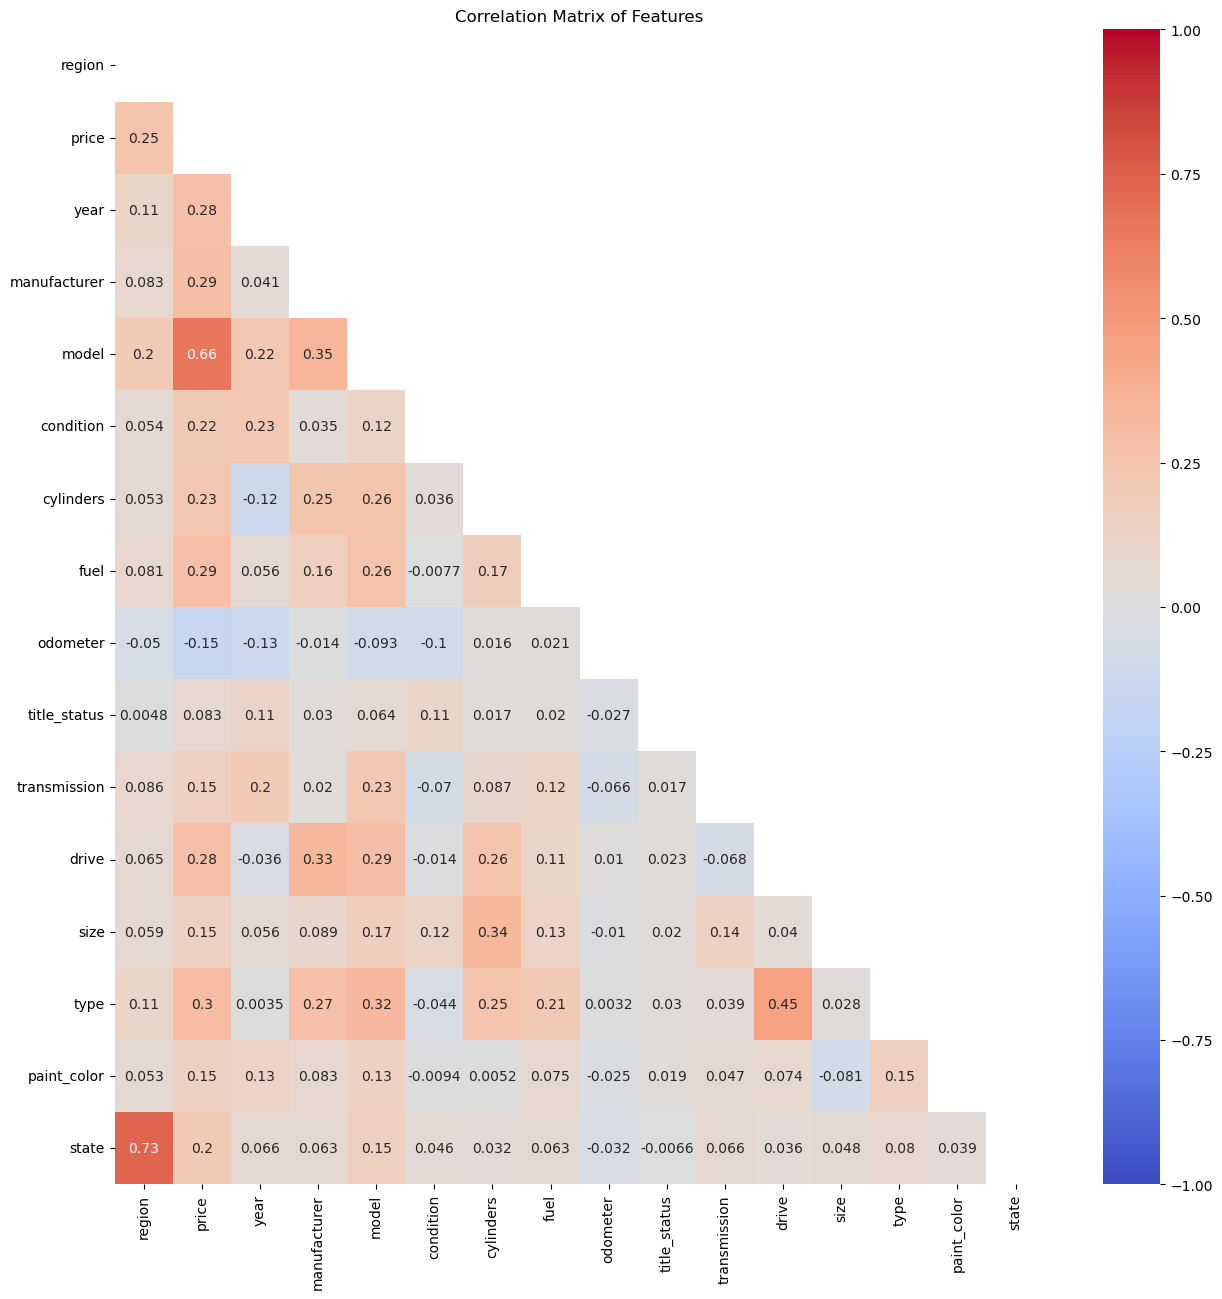

In [189]:
### In place of VIF we will explore collinearity with correlation matrix
plt.figure(figsize=(15,15))

mask = np.triu(np.ones_like(data_corr.corr(), dtype=bool))
sns.heatmap(data_corr.corr(), annot=True, mask=mask, vmin = -1, vmax= 1, cmap="coolwarm")
plt.title('Correlation Matrix of Features')
plt.show()

This is a good preview to cross reference against our models later on. State and region are correlated as expected but we will leave that as is. Model and price are correlated as well.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

##### Transformations

Following our observations from EDA, we will prepare the data in the following way.

Outside of Pipeline:
- Drop ID columns
- Drop duplicates
- Remove outliers in Price
- Drop NA's

To be done in Pipeline:
- Apply Log to price
- Encode
- Scale

In [38]:
dup_columns = data.columns.tolist()
dup_columns.remove('region')
dup_columns.remove('id')
dup_columns.remove('state')
dup_columns

['price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color']

In [39]:
# Drop duplicate records while ensuring no valid duplicates are removed 
# ie. same VIN different sale activity
data1 = data.drop_duplicates(subset = dup_columns, keep='first') # only drops records where all columns are identifical by default

# Drop the identification records first as they are of no further use 
data2 = data1.drop(columns = ['id', 'VIN'])

data2.shape

(248742, 16)

##### Remove outliers in Price

In [40]:
first_quartile = np.log(data2['price']).quantile(0.25)
third_quartile = np.log(data2['price']).quantile(0.75)
iqr = third_quartile - first_quartile
lower = first_quartile - 1.5*iqr
upper = third_quartile + 1.5*iqr
data_no_outlier = data2[(np.log(data2['price']) > lower) & (np.log(data2['price']) < upper)]
data_no_outlier.shape

(224831, 16)

##### Drop NA
Note here is where we differ from EDA approach. The simple fill NA with constant approach, while retaining records, means we also need additional computation time when modelling. 

We will forgo the additional information in favour of faster computation time and see if results are sufficient. A future iteration may revisit this approach.

In [195]:
data_df = data_no_outlier.dropna()
data_df.shape

(57994, 16)

In [196]:
data.shape

(426880, 18)

In [197]:
data_df.describe()

,price,year,odometer
count,57994.0,57994.0,57994.0
mean,12756.140704,2007.46998,128101.229903
std,11768.441451,10.534813,220724.336976
min,599.0,1900.0,0.0
25%,5200.0,2005.0,77486.0
50%,8995.0,2010.0,118359.0
75%,16000.0,2014.0,160043.0
max,155000.0,2022.0,10000000.0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

##### Setup feature and target

In [209]:
price_X = data_df.drop(['price'], axis = 1)
price_y = data_df['price']

##### Setup train and test split
We will hold a test split for after all models have gone through GridSearchCV and use this holdout to do a final validation of performance on unseen data.

In [210]:
X_train, X_test, y_train, y_test = train_test_split(price_X, price_y, 
                                   test_size = .3, 
                                   random_state = 22)

##### Setup encoding lists

In [211]:
### Define lists we'll pass to the encoders
numeric = X_train.select_dtypes('Int64').columns
categorical = X_test.select_dtypes('string').columns

### And additional breakdown of categorical columns
big_cat = []
small_cat = []

for c in categorical:
    if len(data_df[c].unique()) > 10:
        big_cat.append(c)
    else:
        small_cat.append(c)

In [212]:
james_list = big_cat
ohe_list = small_cat
ohe_list.remove('condition')
ordinal_list = ['condition']

##### Encoding

In [213]:
# make all of our encoding and scaling into one single transformer
scaler_ohe_transformer = make_column_transformer(
                        (ce.JamesSteinEncoder(),
                            james_list),

                        (OneHotEncoder(
                            drop = 'if_binary',
                            handle_unknown = 'infrequent_if_exist'), 
                            ohe_list),

                        (OrdinalEncoder(
                            categories = [[
                                'new', 'like new', 'excellent',
                                'good',
                                'fair',
                                'salvage']]
                            ),
                            ordinal_list),

                        #(StandardScaler(), numeric),
                        #remainder='passthrough',
                        sparse_threshold = 0,
                        verbose_feature_names_out = False                        
                        )

In [214]:
# confirm transformer works
transformed_df = pd.DataFrame(
    scaler_ohe_transformer.fit_transform(X_train, np.log(y_train)), 
    columns = scaler_ohe_transformer.get_feature_names_out()
)
transformed_df.head()

,region,manufacturer,model,type,paint_color,state,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,size_compact,size_full-size,size_mid-size,size_sub-compact,condition
0,8.950619,9.183782,8.958298,9.136355,9.222253,9.002711,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
1,9.044686,9.449721,9.264319,9.418209,9.183105,9.077195,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
2,9.103593,9.183782,9.335333,9.418209,9.222253,9.119393,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,9.065304,9.572664,9.910855,9.115663,9.074913,9.130375,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0
4,8.994448,9.215556,9.829244,8.908657,9.026088,9.07434,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


##### Pipeline and GridSearchCV Results (Ridge Only)

In [215]:
# build pipe to tranform both features and target then apply Ridge regression
pipe = Pipeline([
    ('transformer', scaler_ohe_transformer),
    ('scaler', StandardScaler()),
    ('model', TransformedTargetRegressor(
                regressor = Ridge(),
                func = np.log,
                inverse_func = np.exp))
])

In [216]:
# dict of alphas to test
param_dict = {'model__regressor__alpha': 10**np.linspace(-5,4,10)}
param_dict

{'model__regressor__alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
        1.e+03, 1.e+04])}

In [217]:
# apply GridSearchCV to find optimal alpha
ridge_grid = GridSearchCV(
    estimator = pipe,
    scoring = 'neg_mean_squared_error',
    param_grid = param_dict,
    cv = 5, 
    error_score="raise"
)
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(sparse_threshold=0,
                                                          transformers=[('jamessteinencoder',
                                                                         JamesSteinEncoder(),
                                                                         ['region',
                                                                          'manufacturer',
                                                                          'model',
                                                                          'type',
                                                                          'paint_color',
                                                                          'state']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='infrequent_if_exist'),
                                                                         ['cylinders',
                                                                          'fuel',
                                                                          'title_st...
                                                                                                     'fair',
                                                                                                     'salvage']]),
                                                                         ['condition'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=Ridge()))]),
             param_grid={'model__regressor__alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04])},
             scoring='neg_mean_squared_error')

In [218]:
cv_df = pd.DataFrame(ridge_grid.cv_results_, columns = ridge_grid.cv_results_.keys())
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.518962,0.065425,0.069572,0.010197,0.00001,{'model__regressor__alpha': 1e-05},-2.129987e+08,-1.604878e+08,-1.570616e+08,-5.729343e+08,-1.404245e+10,-3.029186e+09,5.508803e+09,10
1,0.415426,0.034818,0.054052,0.000538,0.0001,{'model__regressor__alpha': 0.0001},-2.129987e+08,-1.604878e+08,-1.570616e+08,-5.729342e+08,-1.404245e+10,-3.029186e+09,5.508802e+09,9
2,0.399916,0.009207,0.053741,0.000741,0.001,{'model__regressor__alpha': 0.001},-2.129986e+08,-1.604877e+08,-1.570616e+08,-5.729341e+08,-1.404244e+10,-3.029185e+09,5.508801e+09,8
3,0.391874,0.001306,0.053816,0.000917,0.01,{'model__regressor__alpha': 0.01},-2.129984e+08,-1.604876e+08,-1.570615e+08,-5.729328e+08,-1.404239e+10,-3.029175e+09,5.508782e+09,7
4,0.391771,0.002989,0.053511,0.000389,0.1,{'model__regressor__alpha': 0.1},-2.129961e+08,-1.604863e+08,-1.570601e+08,-5.729195e+08,-1.404191e+10,-3.029075e+09,5.508591e+09,6
5,0.392715,0.007334,0.053451,0.000255,1.0,{'model__regressor__alpha': 1.0},-2.129732e+08,-1.604729e+08,-1.570468e+08,-5.727864e+08,-1.403711e+10,-3.028078e+09,5.506689e+09,5
6,0.392794,0.003024,0.053515,0.000265,10.0,{'model__regressor__alpha': 10.0},-2.127440e+08,-1.603393e+08,-1.569138e+08,-5.714586e+08,-1.398922e+10,-3.018134e+09,5.487707e+09,4
7,0.394139,0.006514,0.053333,0.000945,100.0,{'model__regressor__alpha': 100.0},-2.104836e+08,-1.590224e+08,-1.556015e+08,-5.584315e+08,-1.352085e+10,-2.920878e+09,5.302101e+09,3
8,0.392257,0.002442,0.053129,0.000820,1000.0,{'model__regressor__alpha': 1000.0},-1.906797e+08,-1.475397e+08,-1.441252e+08,-4.498504e+08,-9.736482e+09,-2.133735e+09,3.803057e+09,2
9,0.391073,0.003275,0.054080,0.000944,10000.0,{'model__regressor__alpha': 10000.0},-1.191249e+08,-1.081387e+08,-1.038362e+08,-1.455253e+08,-9.091412e+08,-2.771532e+08,3.163265e+08,1


In [219]:
y_pred = ridge_grid.best_estimator_.predict(X_test)
result_df = X_test
result_df['actual'] = y_test
result_df['predict'] = y_pred
result_df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,actual,predict
198054,detroit metro,2018,ford,taurus,excellent,6 cylinders,gas,30013,clean,automatic,fwd,full-size,sedan,white,mi,15995,7212.429126
185569,boston,2006,chevrolet,silverado 2500hd,excellent,8 cylinders,gas,217000,clean,automatic,4wd,full-size,pickup,black,ma,15000,15633.394103
393990,norfolk / hampton roads,2008,chevrolet,impala,like new,6 cylinders,gas,98000,clean,automatic,fwd,full-size,sedan,brown,va,4500,8104.190709
63371,SF bay area,2012,honda,odyssey exl,excellent,6 cylinders,gas,58000,clean,automatic,fwd,full-size,van,grey,ca,15500,8117.636881
234240,charlotte,2013,lincoln,mkx,excellent,6 cylinders,gas,120000,lien,automatic,fwd,mid-size,SUV,brown,nc,12000,10624.502535


In [220]:
final_mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {final_mse} \
      \nrMSE: {np.sqrt(final_mse)}')

MSE: 222812725.84407917       
rMSE: 14926.91280352636


In [221]:
feature_names = transformed_df.columns
coefs = ridge_grid.best_estimator_.named_steps['model'].regressor_.coef_
best_ridge_df = pd.DataFrame({'feature': feature_names, 'coef': coefs}, columns = ['feature', 'coef'])
best_ridge_df.sort_values(by = 'coef', ascending = False)

,feature,coef
2,model,0.280859
0,region,0.081639
3,type,0.070852
4,paint_color,0.053501
28,drive_4wd,0.048529
1,manufacturer,0.034771
14,fuel_diesel,0.033593
20,title_status_lien,0.025589
12,cylinders_8 cylinders,0.015859
23,title_status_rebuilt,0.014808


##### Pipeline and GridSearchCV Results (Linear Regression, Ridge, Lasso)

In [222]:
# build pipe to tranform both features and target then apply various regression models
pipe = Pipeline([
    ('transformer', scaler_ohe_transformer),
    ('scaler', StandardScaler()),
    ('model', 'passthrough')
])

In [223]:
# dict of hyperparameters and models to test
param_dict = [
    { # linear reg model 
        'model': [
            TransformedTargetRegressor(
                regressor = LinearRegression(),
                func = np.log,
                inverse_func = np.exp)
            ]
    },
    { # ridge model 
        'model': [
            TransformedTargetRegressor(
                regressor = Ridge(),
                func = np.log,
                inverse_func = np.exp)
            ],
        'model__regressor__alpha': 
            10**np.linspace(-5,4,10)
    },
    { # lasso model 
        'model': [
            TransformedTargetRegressor(
                regressor = Lasso(),
                func = np.log,
                inverse_func = np.exp)
            ],
        'model__regressor__alpha': 
            10**np.linspace(-5,0,6)
    }
]

param_dict

[{'model': [TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                              regressor=LinearRegression())]},
 {'model': [TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                              regressor=Ridge())],
  'model__regressor__alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
         1.e+03, 1.e+04])},
 {'model': [TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                              regressor=Lasso())],
  'model__regressor__alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])}]

In [224]:
# apply GridSearchCV to find optimal model and params
model_grid = GridSearchCV(
    estimator = pipe,
    scoring = 'neg_mean_squared_error',
    param_grid = param_dict,
    cv = 5, 
    error_score="raise"
)
#model_grid
model_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(sparse_threshold=0,
                                                          transformers=[('jamessteinencoder',
                                                                         JamesSteinEncoder(),
                                                                         ['region',
                                                                          'manufacturer',
                                                                          'model',
                                                                          'type',
                                                                          'paint_color',
                                                                          'state']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='infrequent_if_exist'),
                                                                         ['cylinders',
                                                                          'fuel',
                                                                          'title_st...
                                                               inverse_func=<ufunc 'exp'>,
                                                               regressor=Ridge())],
                          'model__regressor__alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04])},
                         {'model': [TransformedTargetRegressor(func=<ufunc 'log'>,
                                                               inverse_func=<ufunc 'exp'>,
                                                               regressor=Lasso())],
                          'model__regressor__alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])}],
             scoring='neg_mean_squared_error')

In [225]:
cv_df = pd.DataFrame(model_grid.cv_results_, columns = model_grid.cv_results_.keys())
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__regressor__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.515965,0.059860,0.065236,0.004749,"TransformedTargetRegressor(func=<ufunc 'log'>,...",NaN,{'model': TransformedTargetRegressor(func=<ufu...,-2.127184e+08,-1.606145e+08,-1.570409e+08,-5.719708e+08,-1.399506e+10,-3.019481e+09,5.489960e+09,9
1,0.405018,0.006047,0.055478,0.001147,"TransformedTargetRegressor(func=<ufunc 'log'>,...",0.00001,{'model': TransformedTargetRegressor(func=<ufu...,-2.129987e+08,-1.604878e+08,-1.570616e+08,-5.729343e+08,-1.404245e+10,-3.029186e+09,5.508803e+09,17
2,0.398483,0.002495,0.054510,0.000451,"TransformedTargetRegressor(func=<ufunc 'log'>,...",0.0001,{'model': TransformedTargetRegressor(func=<ufu...,-2.129987e+08,-1.604878e+08,-1.570616e+08,-5.729342e+08,-1.404245e+10,-3.029186e+09,5.508802e+09,16
3,0.410049,0.015875,0.055549,0.001119,"TransformedTargetRegressor(func=<ufunc 'log'>,...",0.001,{'model': TransformedTargetRegressor(func=<ufu...,-2.129986e+08,-1.604877e+08,-1.570616e+08,-5.729341e+08,-1.404244e+10,-3.029185e+09,5.508801e+09,15
4,0.410344,0.013756,0.055236,0.001133,"TransformedTargetRegressor(func=<ufunc 'log'>,...",0.01,{'model': TransformedTargetRegressor(func=<ufu...,-2.129984e+08,-1.604876e+08,-1.570615e+08,-5.729328e+08,-1.404239e+10,-3.029175e+09,5.508782e+09,14
5,0.400974,0.008574,0.055753,0.001312,"TransformedTargetRegressor(func=<ufunc 'log'>,...",0.1,{'model': TransformedTargetRegressor(func=<ufu...,-2.129961e+08,-1.604863e+08,-1.570601e+08,-5.729195e+08,-1.404191e+10,-3.029075e+09,5.508591e+09,13
6,0.400010,0.010234,0.055024,0.001469,"TransformedTargetRegressor(func=<ufunc 'log'>,...",1.0,{'model': TransformedTargetRegressor(func=<ufu...,-2.129732e+08,-1.604729e+08,-1.570468e+08,-5.727864e+08,-1.403711e+10,-3.028078e+09,5.506689e+09,11
7,0.383384,0.001994,0.053049,0.000487,"TransformedTargetRegressor(func=<ufunc 'log'>,...",10.0,{'model': TransformedTargetRegressor(func=<ufu...,-2.127440e+08,-1.603393e+08,-1.569138e+08,-5.714586e+08,-1.398922e+10,-3.018134e+09,5.487707e+09,8
8,0.388014,0.004680,0.053228,0.000437,"TransformedTargetRegressor(func=<ufunc 'log'>,...",100.0,{'model': TransformedTargetRegressor(func=<ufu...,-2.104836e+08,-1.590224e+08,-1.556015e+08,-5.584315e+08,-1.352085e+10,-2.920878e+09,5.302101e+09,6
9,0.386211,0.000878,0.054540,0.002138,"TransformedTargetRegressor(func=<ufunc 'log'>,...",1000.0,{'model': TransformedTargetRegressor(func=<ufu...,-1.906797e+08,-1.475397e+08,-1.441252e+08,-4.498504e+08,-9.736482e+09,-2.133735e+09,3.803057e+09,4


In [226]:
model_grid.best_estimator_.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('transformer',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('jamessteinencoder',
                                                  JamesSteinEncoder(),
                                                  ['region', 'manufacturer',
                                                   'model', 'type',
                                                   'paint_color', 'state']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='infrequent_if_exist'),
                                                  ['cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                             

In [228]:
y_pred = model_grid.best_estimator_.predict(X_test)
result_df = X_test
result_df['actual'] = y_test
result_df['predict'] = y_pred
result_df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,actual,predict
198054,detroit metro,2018,ford,taurus,excellent,6 cylinders,gas,30013,clean,automatic,fwd,full-size,sedan,white,mi,15995,9067.867958
185569,boston,2006,chevrolet,silverado 2500hd,excellent,8 cylinders,gas,217000,clean,automatic,4wd,full-size,pickup,black,ma,15000,9067.867958
393990,norfolk / hampton roads,2008,chevrolet,impala,like new,6 cylinders,gas,98000,clean,automatic,fwd,full-size,sedan,brown,va,4500,9067.867958
63371,SF bay area,2012,honda,odyssey exl,excellent,6 cylinders,gas,58000,clean,automatic,fwd,full-size,van,grey,ca,15500,9067.867958
234240,charlotte,2013,lincoln,mkx,excellent,6 cylinders,gas,120000,lien,automatic,fwd,mid-size,SUV,brown,nc,12000,9067.867958


In [229]:
final_mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {final_mse} \
      \nrMSE: {np.sqrt(final_mse)}')

MSE: 148146105.31004325       
rMSE: 12171.528470576046


In [230]:
feature_names = transformed_df.columns
coefs = model_grid.best_estimator_.named_steps['model'].regressor_.coef_
best_model_df = pd.DataFrame({'feature': feature_names, 'coef': coefs}, columns = ['feature', 'coef'])
best_model_df.sort_values(by = 'coef', ascending = False)

,feature,coef
0,region,0.0
1,manufacturer,0.0
20,title_status_lien,0.0
21,title_status_missing,-0.0
22,title_status_parts only,-0.0
23,title_status_rebuilt,0.0
24,title_status_salvage,-0.0
25,transmission_automatic,0.0
26,transmission_manual,-0.0
27,transmission_other,0.0


##### Pipeline and GridSearchCV Results (Sequential Feature Selector)

In [289]:
sequential_pipe = Pipeline([
    ('transformer', scaler_ohe_transformer),
    ('scaler', StandardScaler()),
    ('selector', SequentialFeatureSelector(
        estimator=LinearRegression()
        )),
    ('model', TransformedTargetRegressor(
                regressor = LinearRegression(),
                func = np.log,
                inverse_func = np.exp))
])

In [292]:
# dict of n features to test
param_dict = {'selector__n_features_to_select': range(1,6)}
param_dict

{'selector__n_features_to_select': range(1, 6)}

In [293]:
# apply GridSearchCV to find optimal n features
sfs_grid = GridSearchCV(
    estimator = sequential_pipe,
    scoring = 'neg_mean_squared_error',
    param_grid = param_dict,
    cv = 5, 
    error_score="raise"
)
sfs_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(sparse_threshold=0,
                                                          transformers=[('jamessteinencoder',
                                                                         JamesSteinEncoder(),
                                                                         ['region',
                                                                          'manufacturer',
                                                                          'model',
                                                                          'type',
                                                                          'paint_color',
                                                                          'state']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='infrequent_if_exist'),
                                                                         ['cylinders',
                                                                          'fuel',
                                                                          'title_st...
                                                                         ['condition'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('selector',
                                        SequentialFeatureSelector(estimator=LinearRegression())),
                                       ('model',
                                        TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=LinearRegression()))]),
             param_grid={'selector__n_features_to_select': range(1, 6)},
             scoring='neg_mean_squared_error')

In [295]:
cv_df = pd.DataFrame(sfs_grid.cv_results_, columns = sfs_grid.cv_results_.keys())
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_selector__n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.960430,0.078723,0.052846,0.001714,1,{'selector__n_features_to_select': 1},-7.200960e+08,-3.894582e+08,-3.904321e+08,-5.832531e+10,-1.873668e+12,-3.866986e+11,7.438219e+11,5
1,1.755662,0.015499,0.049557,0.000413,2,{'selector__n_features_to_select': 2},-4.638552e+08,-3.168937e+08,-3.331070e+08,-1.481401e+10,-3.374555e+11,-7.067668e+10,1.335067e+11,4
2,2.727550,0.054450,0.052090,0.001689,3,{'selector__n_features_to_select': 3},-4.644453e+08,-3.203401e+08,-3.305327e+08,-7.563511e+09,-1.524392e+11,-3.222360e+10,6.017231e+10,3
3,4.074408,0.266630,0.056422,0.000915,4,{'selector__n_features_to_select': 4},-3.961942e+08,-2.777321e+08,-2.681415e+08,-3.847026e+09,-8.415171e+10,-1.778816e+10,3.321000e+10,2
4,4.957730,0.035653,0.055858,0.001151,5,{'selector__n_features_to_select': 5},-2.559280e+08,-1.923719e+08,-1.920432e+08,-1.081857e+09,-1.658919e+10,-3.662278e+09,6.472242e+09,1


In [296]:
y_pred = sfs_grid.best_estimator_.predict(X_test)
result_df = X_test
result_df['actual'] = y_test
result_df['predict'] = y_pred
result_df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,actual,predict
198054,detroit metro,2018,ford,taurus,excellent,6 cylinders,gas,30013,clean,automatic,fwd,full-size,sedan,white,mi,15995,6459.605609
185569,boston,2006,chevrolet,silverado 2500hd,excellent,8 cylinders,gas,217000,clean,automatic,4wd,full-size,pickup,black,ma,15000,14847.428758
393990,norfolk / hampton roads,2008,chevrolet,impala,like new,6 cylinders,gas,98000,clean,automatic,fwd,full-size,sedan,brown,va,4500,9374.817530
63371,SF bay area,2012,honda,odyssey exl,excellent,6 cylinders,gas,58000,clean,automatic,fwd,full-size,van,grey,ca,15500,9685.001876
234240,charlotte,2013,lincoln,mkx,excellent,6 cylinders,gas,120000,lien,automatic,fwd,mid-size,SUV,brown,nc,12000,10861.961628


In [297]:
final_mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {final_mse} \
      \nrMSE: {np.sqrt(final_mse)}')

MSE: 1443673815.862975       
rMSE: 37995.70786105945


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

##### Model evalution

We selected MSE and rMSE as the primary evaluation metrics to select our final model. The rationale is MSE is the most appropriate choice for regression estimators, and rMSE allows the error to be interpreted in the same scale as the target variable.

While the Lasso model with alpha = 1 scored best, the Ridge model with alpha = 10,000 was a close second. On further inspection the Lasso model effectively reduced all coefficients to 0 which makes it ultimately not useful (ie. no understanding of feature importance, predicts the same price for all cars). 

Hence, the Ridge model is the final model of choice with the slightly higher MSE and rMSE:

    MSE: 222812725.84407917       
    rMSE: 14926.91280352636

We interpreted the coeffiecients of the Ridge model as follows. The following features with largest coefficients mean they have the most influence on the model. We discard region from the final explanation in the absence of sufficient understanding of the definition (is it the place of sale, place of listing, place of production, or place previously used?).

    model	    0.280859
    region	    0.081639
    type	    0.070852
    paint_color	0.053501
    drive_4wd	0.048529
    condition	-0.245564

The remaining features are further expanded on below to extract additional explanations.

##### Findings

Based on the ridge model findings we discover what are the features that drive price. We can further explain that behaviour by performing an additional layer of inferential analysis below for each of these features to elaborate.



##### Model vs Price

In [42]:
# groupby to understand used car models and their average price / volume
data_plot = data_no_outlier.dropna()
model_price = data_plot[['model','price']].groupby('model').agg('mean')
model_price['count'] = data_plot[['model','price']].groupby('model').agg('count')['price']
model_price.sort_values(by = ['count','price'],ascending=False).head(20)

,price,count
model,,
f-150,16775.962049,1054
silverado 1500,18466.171934,791
1500,16722.262987,616
silverado,14709.898551,552
accord,6942.879781,549
camry,6906.99619,525
civic,6999.084886,483
tacoma,18888.108808,386
altima,7256.116095,379


##### Type vs Price

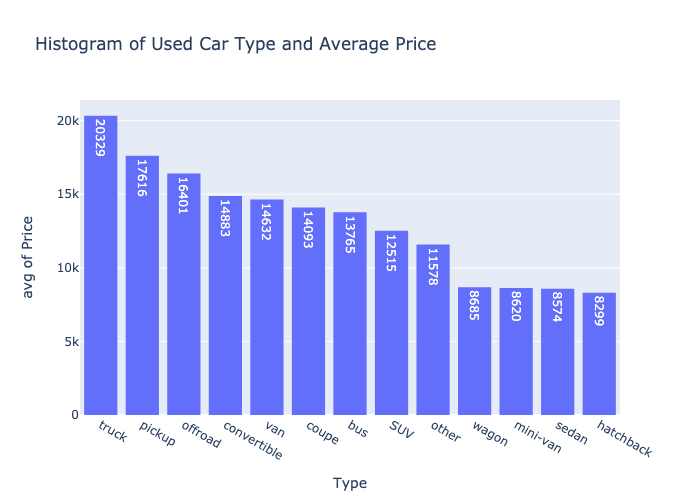

In [43]:
# plot histogram of type vs price
plot = px.histogram(x = data_plot['type'],
                    y = data_plot['price'],
                    title='Histogram of Used Car Type and Average Price',
                    labels = {'y': 'Price', 'x': 'Type'},
                    histfunc = 'avg',
                    text_auto = '.0f',
                    )
plot.update_layout(xaxis={'categoryorder':'mean descending'}) 
plot.show('png')

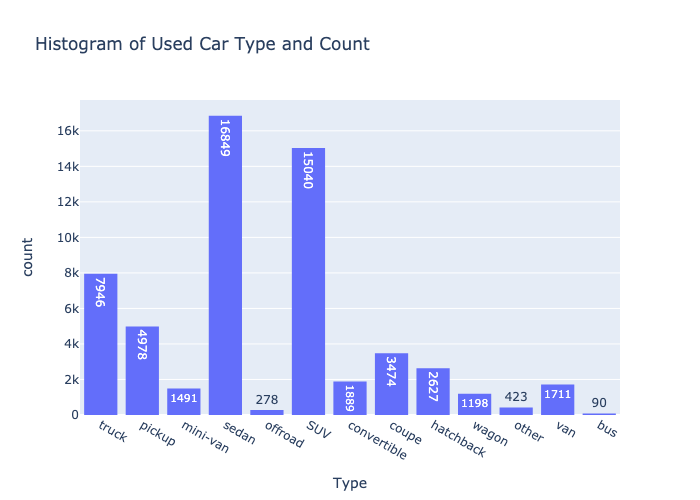

In [44]:
# plot histogram of type vs count
plot = px.histogram(x = data_plot['type'],
                    y = data_plot['price'],
                    title='Histogram of Used Car Type and Count',
                    labels = {'y': 'Price', 'x': 'Type'},
                    histfunc = 'count',
                    text_auto = '.0f',
                    )
plot.show('png')

##### Paint Color vs Price

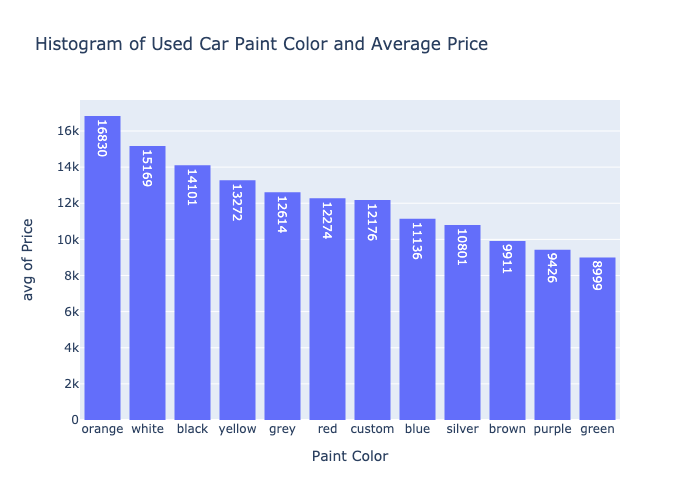

In [45]:
# plot histogram of color vs price
plot = px.histogram(x = data_plot['paint_color'],
                    y = data_plot['price'],
                    title='Histogram of Used Car Paint Color and Average Price',
                    labels = {'y': 'Price', 'x': 'Paint Color'},
                    histfunc = 'avg',
                    text_auto = '.0f',
                    )
plot.update_layout(xaxis={'categoryorder':'mean descending'}) 
plot.show('png')

##### Drive vs Price

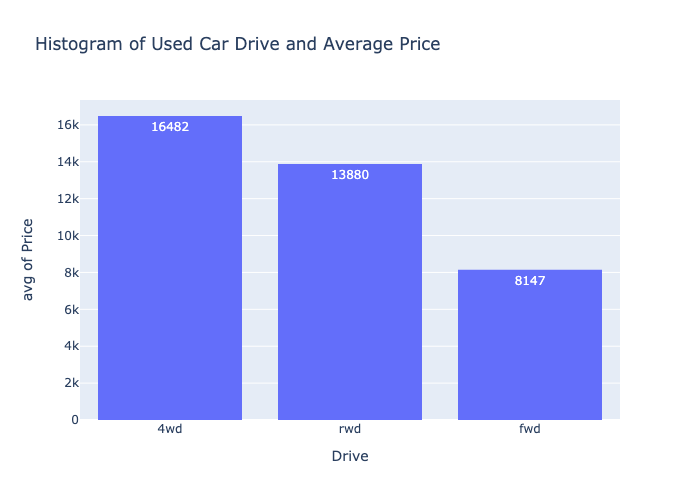

In [46]:
# plot histogram of drive vs price
plot = px.histogram(x = data_plot['drive'],
                    y = data_plot['price'],
                    title='Histogram of Used Car Drive and Average Price',
                    labels = {'y': 'Price', 'x': 'Drive'},
                    histfunc = 'avg',
                    text_auto = '.0f'
                    )
plot.update_layout(xaxis={'categoryorder':'mean descending'}) 
plot.show('png')

##### Condition and Price

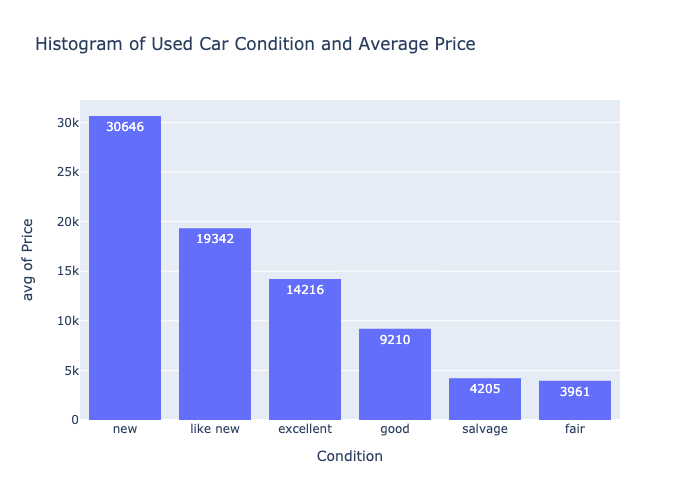

In [47]:
# plot histogram of condition vs price
plot = px.histogram(x = data_plot['condition'],
                    y = data_plot['price'],
                    title='Histogram of Used Car Condition and Average Price',
                    labels = {'y': 'Price', 'x': 'Condition'},
                    histfunc = 'avg',
                    text_auto = '.0f'
                    )
plot.update_layout(xaxis={'categoryorder':'mean descending'}) 
plot.show('png')

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

##### Findings and actionable items

We set out to understand what factors make a car more or less expensive. From our modeling on the used car dataset, we were able to extract the most important factors to the price of a used car in the marketplace. 

**Actionable items**

The model ranked the following five features highest in importance. We expand on it with the following recommendations. When refining your inventory, place emphasis on the following five points most:

- Model: Choose models that have a blend of high average price and volume in the marketplace. For example the top four vehicles in this vein are the F-150 and the Silverado, ranging from $14-18K on average and have high inventory to move around.

- Type: Relatedly, the marketplace values Trucks, Pick-ups, and Off-road cars. These average from $16-20K and are more than double the price of the least favourable cars, such as hatchbacks and sedans.
- Paint Color: White and black command among the highest average price between $14-15K. Avoid exotic colors other than Orange. Orange nets the highest average price at over $16K.
- Drive: The marketplace prefers 4WD most and desire FWD least. On average 4WD price is double that of a FWD, with 4WDs priced at $16K on average.

Lastly, the obvious that cannot be overstated:

- Condition: Select inventory that is in the best condition possible, the average price drops $5K in value moving down each condition level. From 'new' to 'like new' that drop is even higher at $10K on average.

**Next steps and recommendations**

- Immediately refine inventory where possible to maximize your lot capacity with used cars sharing the features above that the marketplace values, thereby improving your sales volume and sales margins. Lot space and labour costs are not free after all - make every spot count!

- We recommend using the available predictive model as a starting point when attempting to price new inventory competitively, which will reduce a used car's time on your lot and improve inventory turnover.

- Lastly, continue to collect data on your used car sales going forward so that the predictive model can be iterated upon with first-hand data.